<a href="https://colab.research.google.com/github/josephmhernandez/SkinCancerDetection/blob/master/SkinCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Ham dataset


# New Section

Exploring the HAM10000 data set. 
This dataset contains images of skin lesions that have been classified into 7 different categories: 

1.  bcc -> Basal cell carcinoma: common variant of epithelial skin cancer
2. bkl -> Benign keratosis - Generic class. Dermatoscopically, there are three subgroups that could look different but in this dataset they are all grouped together because they are similar biologically and reported under the same generic term. Hard to distinguish between this and melanoma. 
3. df -> Dermatofibroma: benign skin lesion
4. nv -> Melanocytic nevi are benign neoplasms of melanocytes and appear variants that can differ significantly from a dermatoscopic view. 
5. mel -> Melanoma: malignant neoplasm that may appear in a variety of variants. This dataset excludes non-pigmented subungual, ocular or mucosal melanoma.
6. vasc -> Vascular skin lesions could be benign or not.  
7. akiec -> Actinic Keratoses and Intraepithelial Carcinoma are common non-invasive, variants of squamous cell carcinoma that can be treated locally without surgery.

In [0]:
#Mount Google Drive. 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Value Counts


In [0]:
#Open the csv file and output diagnostics for dataset. 
import pandas as pd
#Import csv file. 
metaDataCsv = pd.read_csv('gdrive/My Drive/SkinCancerDetection/HAM10000_metadata.csv')

cols = metaDataCsv.columns
_temp_str = 'Columns: '
for c in cols:
    _temp_str += c + ', '
_temp_str = _temp_str[:len(_temp_str)-2]
print(_temp_str)

for c in cols:
    print()
    print(c + ':')
    print(metaDataCsv[c].value_counts())

Columns: lesion_id, image_id, dx, dx_type, age, sex, localization

lesion_id:
HAM_0003789    6
HAM_0000835    6
HAM_0001863    6
HAM_0005263    6
HAM_0007343    5
              ..
HAM_0001086    1
HAM_0006428    1
HAM_0006926    1
HAM_0002598    1
HAM_0007325    1
Name: lesion_id, Length: 7470, dtype: int64

image_id:
ISIC_0033284    1
ISIC_0029572    1
ISIC_0030642    1
ISIC_0025876    1
ISIC_0033882    1
               ..
ISIC_0031303    1
ISIC_0034216    1
ISIC_0034088    1
ISIC_0026673    1
ISIC_0028502    1
Name: image_id, Length: 10015, dtype: int64

dx:
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

dx_type:
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

age:
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
1

## Distrubtion of Images

In [0]:
#Distribution of diagnosed leisons. 
dx_counts = metaDataCsv['dx'].value_counts()

_size = metaDataCsv['dx'].size
print('dx:\tCount:\tPercent:')
for key,val in dx_counts.iteritems():
    _percentage = val / _size * 100
    print(key + '\t'+ str(val) + '\t' + '{0:.2f}'.format(_percentage) + '%')
print('Total images: ' + str(_size))
    

dx:	Count:	Percent:
nv	6705	66.95%
mel	1113	11.11%
bkl	1099	10.97%
bcc	514	5.13%
akiec	327	3.27%
vasc	142	1.42%
df	115	1.15%
Total images: 10015


From looking at the data we can see the type of skin leison in this dataset is not evenly distributed througout the seven types. We can also see that there were different pictures from the same leison. When differentiating images we should use the image_id as a key. From looking at the percentage of the vlaues are in nv the baseline for the model will need to be an accuracy above 67%.

For image classification, the only necessary data from this csv file will be the image_id and the diagnosis. The images were named with the image_id. 

Training data for the model will be the pixels of the image and the diagnosis (dx) will be label. 



# Preprocessing Images


In [0]:
#Mount to google drive. 
#Create dictionary with image_id, dx for the training labels. 
 
#Save image tesnors as .npy files so that it'll be quicker to train the model. 
    #Storing images as .npy files will allow us to quickly access the pixel 
        #values for each image in order to train the model quicker. This format 
        #will also allow us to create a funciton generator to use multiprocessing
        #to train/test the neural network. 

#Mount Google Drive. 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Create dictionary with {image_id: dx} for the training labels.
import pandas as pd
metadata_df = pd.read_csv('gdrive/My Drive/SkinCancerDetection/HAM10000_metadata.csv')

ids = metadata_df['image_id']
labels = {}

for id in ids:
    if id in labels:
        print('oof....' + id)
    else:
        _x = metadata_df.loc[metadata_df['image_id'] == id]['dx']
        labels[id] = str(_x.iloc[0])

# Images to pickle file

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

#Mount Google Drive. 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

data_dir = 'gdrive/My Drive/SkinCancerDetection/'
cats = ['HAM10000_images_part_1/', 'HAM10000_images_part_2/']

for cat in cats:
    path = os.path.join(data_dir, cat)
    for img in os.listdir(path): 
        _img_arr =cv2.imread(os.path.join(path, img))
        
        plt.imshow(_img_arr)
        plt.show()
        break
    break

Mounted at /content/gdrive


OSError: ignored

## Convert Image Format




In [0]:
#Open all images in the google drive folders and convert images to a 3 dimensional
#   tesnor (height, width, depth).
import numpy as np
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# #PART 1.
counter = 0

location_pics_1 = 'gdrive/My Drive/SkinCancerDetection/HAM10000_images_part_1/'
picture_names_1 = np.array(os.listdir(location_pics_1))

for name in picture_names_1:
    _img = load_img(location_pics_1 + name)
    _p = img_to_array(_img)
    _pixels = _p.reshape(_p.shape)

    # Print image out to output. 
    # array_to_img(_pixels)
    _new_file_name = name[:len(name)-4]
    np.savez_compressed(write_location + _new_file_name, data=_pixels)
    
    counter += 1
    if(counter % 500 == 0):
        print(counter)

#Part 2. 

location_pics_2 = 'gdrive/My Drive/SkinCancerDetection/HAM10000_images_part_2/'
picture_names_2 = np.array(os.listdir(location_pics_2))

for name in picture_names_2:
    _img = load_img(location_pics_2 + name)
    _p = img_to_array(_img)
    _pixels = _p.reshape(_p.shape)

    # Print image out to output. 
    # array_to_img(_pixels)
    _new_file_name = name[:len(name)-4]
    np.savez_compressed(write_location + _new_file_name, data=_pixels)
    counter += 1

    if(counter % 500 == 0):
        print(counter)






In [0]:
#HOW TO OPEN COMPRESSED FILES. 
a = np.load(write_location + 'ISIC_0033321.npz')
print(a.keys())

print(np.array_equal(_pixels, a['data']))
print(a['data'].shape)


In [0]:
#Check dataaset and labels same size. 
import os

lst = os.listdir(write_location)
print(len(lst))

10015


# Function Generator



In [0]:
#Allows multiprocessing during training. 
import numpy as np
import random
import json
import os
import keras


class DataGenerator(keras.utils.Sequence):

    def __init__(self, list_IDs, labels, location="location__", batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        #'Initialization'

        #(number of channels, number of classes, batch size)
        self.dim = dim
        
        self.batch_size = batch_size

        #Dictionary whwere labels[ID] = label
        self.labels = labels
        
        #List of 
        self.list_IDs = list_IDs

        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.location_data = location


    def on_epoch_end(self):
        #Updates indexes after each epoch
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)


    def __data_generation(self, list_IDs_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample 
            a = np.load(self.location_data + ID + '.npz')
            X[i,] = a['data']
           
            # Store class
            y[i] = self.labels[ID]
            # print(y.shape)
        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

        # return X, keras.utils.to_categorical(y, num_classes=self.n_classes)
    def tester(self, names):
        return self.__data_generation(names)

        
    def __len__(self):
        #'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        #'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y


# Build Model 

In [0]:
import keras
from keras import optimizers
from keras import models
from keras import layers
from keras.models import Model
from keras.optimizers import adam

def build_model_1():
    #Build inception model. 

    input_shape = (450, 600, 3)
    num_classes = 7

    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
    model.add(layers.Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
    model.add(layers.MaxPool2D(pool_size = (2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.40))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    optimizer = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    # Compile the model
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

    # # Set a learning rate annealer
    # learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
    #                                             patience=3, 
    #                                             verbose=1, 
    #                                             factor=0.5, 
    #                                             min_lr=0.00001)

    # model.summary()

    return model

In [0]:
# !pip show tensorflow

# !pip install tensorflow==1.14
model = build_model_1()

# n_channels = 3
# batch_size = 32
#









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




# Training Prep




In [0]:
import os
#Mount google drive. 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#Create dictionary with {image_id: dx} for the training labels.
import pandas as pd
metadata_df = pd.read_csv('gdrive/My Drive/SkinCancerDetection/HAM10000_metadata.csv')

ids = metadata_df['image_id']
labels = {}
cat_data = {
    	'df' : 1,
        'nv' : 2,	
        'mel' : 3,	
        'bkl' : 4,	
        'bcc' : 5,	
        'akiec' : 6,	
        'vasc' : 0
}


for id in ids:
    if id in labels:
        print('oof....' + id)
    else:
        _x = metadata_df.loc[metadata_df['image_id'] == id]['dx']
        _tempCat = str(_x.iloc[0])
        labels[id] = cat_data[_tempCat]


Mounted at /content/gdrive


In [0]:
#Debug. 
import numpy as np
a = np.load('gdrive/My Drive/SkinCancerDetection/Dataset/' + data_files[0])
p = a['data']

print(p.shape)

(450, 600, 3)


In [0]:
import numpy as np
import random
import os

data = {}

# root = 'gdrive/My Drive/SkinCancerDetection/'

data_files = os.listdir('gdrive/My Drive/SkinCancerDetection/Dataset/')
random.seed(4)
random.shuffle(data_files)

train_index = int(len(data_files) * .8)
validation_index = int(train_index * .15)

data['test'] = np.array([ x[:len(x)-4] for x in np.array(data_files[train_index:])])
data['validation'] = np.array([x[:len(x)-4] for x in np.array(data_files[:validation_index])])
data['train'] = np.array([x[:len(x)-4] for x in np.array(data_files[validation_index:train_index])])

print(cat_data)
for d in data:
    print('Partition: ' + str(d))
    counts = {}
    for lab in data[d]:
        if labels[lab] in counts:
            counts[labels[lab]] = counts[labels[lab]] + 1
        else:
            counts[labels[lab]] = 1

    print(counts)

          

{'df': 1, 'nv': 2, 'mel': 3, 'bkl': 4, 'bcc': 5, 'akiec': 6, 'vasc': 0}
Partition: test
{2: 1324, 3: 225, 4: 214, 6: 77, 5: 111, 1: 24, 0: 28}
Partition: validation
{5: 63, 2: 818, 0: 19, 1: 12, 6: 43, 4: 128, 3: 118}
Partition: train
{2: 4563, 3: 770, 5: 340, 4: 757, 1: 79, 0: 95, 6: 207}


# Training


In [0]:
import os
import numpy as np
import random
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

#Hyper-parameters 

batch_size = 64
num_epochs = 30
import numpy as np

#Create dictionary entries of all data. 
py_train_path = 'gdrive/My Drive/SkinCancerDetection/Dataset/'


params ={'location': py_train_path,
        'dim': (240, 320),
          'batch_size': batch_size,
          'n_classes': 7,
          'n_channels': 3,
          'shuffle': True}

validation_params ={'location': py_train_path,
        'dim': (240, 320),
          'batch_size': len(data['validation']),
          'n_classes': 7,
          'n_channels': 3,
          'shuffle': True}
        
test_params = {'location': py_train_path,
        'dim': (240, 320),
          'batch_size': len(data['test']),
          'n_classes': 7,
          'n_channels': 3,
          'shuffle': True}

testing_generator = DataGenerator(data['test'], labels, **test_params)
training_generator = DataGenerator(data['train'], labels, **params)
validating_generator = DataGenerator(data['validation'], labels, **validation_params)

model = build_model_1()

filepath="SC-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit_generator(generator=training_generator, validation_data=validating_generator, callbacks = callbacks_list, validation_freq = 1, use_multiprocessing=True, workers=16, epochs=num_epochs,verbose=1)





# Re-try





In [1]:
import os
#Mount google drive. 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import numpy as np
import cv2 
import os
import pickle
import keras
from keras import optimizers
from keras import models
from keras import layers
from keras.models import Model
from keras.optimizers import adam
from keras.utils import plot_model
from keras.applications.densenet import DenseNet201
import keras.backend as K
from keras.optimizers import Adam
#For no more tensor flow warnings. 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(240,320,3),padding='same'))
    model.add(layers.MaxPooling2D((2, 2),padding='same'))
    model.add(layers.Dropout(0.20))

    model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(layers.Dropout(0.40))

    model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
    model.add(layers.LeakyReLU(alpha=0.1))                  
    model.add(layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(layers.Dropout(0.20))
    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='linear'))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.Dense(128, activation='linear'))
    model.add(layers.Dense(256, activation='linear'))
    model.add(layers.Dense(7, activation='softmax'))

    model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

# t = build_model()
# plot_model(t, show_shapes=True)
# t.summary()

def build_densenet_model():
    pre_trained_model = DenseNet201(input_shape=(192, 256, 3), include_top=False, weights="imagenet")
    for layer in pre_trained_model.layers:
        # print(layer.name)
        if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
            layer.trainable = True
            K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
            K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
        else:
            layer.trainable = False
    
    last_layer = pre_trained_model.get_layer('relu')
    print('last layer output shape:', last_layer.output_shape)
    last_output = last_layer.output

    # Flatten the output layer to 1 dimension
    x = layers.GlobalMaxPooling2D()(last_output)
    # Add a fully connected layer with 512 hidden units and ReLU activation
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(7, activation='softmax')(x)

    # Configure and compile the model

    model = Model(pre_trained_model.input, x)
    optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=True)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    
    return model 

_t = build_densenet_model()
_t.summary()

def load_data(path):
	#Loads data from pickled skin cancer images. 
	#Returns (X, y) X.shape == ( , ) y.shpae = ()
	# path = '/home/joseph/Documents/school/SkinCancer/Data'
	
    # new_path = os.
    pickle_in = open(path + 'Xsmall.pickle', 'rb')
    X = pickle.load(pickle_in)

    pickle_in = open(path + 'ysmall.pickle', 'rb')
    y = pickle.load(pickle_in)

    pickle_in = open(path + 'n.pickle', 'rb')
    n = pickle.load(pickle_in)
    # print(y)
    y = keras.utils.to_categorical(y, num_classes=7, dtype='float32')
    return (X, y, n)



Mounted at /content/gdrive


Using TensorFlow backend.


74842112/74836368 [==============================] - 1s 0us/step
last layer output shape: (None, 6, 8, 1920)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 192, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 198, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 96, 128, 64)  9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 96, 128, 64)  256         conv1/conv[0][0] 

In [0]:
#If model shows @placeholder error then run this block. 
!pip install --upgrade pip setuptools wheel
!pip install -I tensorflow
!pip install -I keras

In [3]:
import random

# model = build_model()
# model.summary()

py_path = 'gdrive/My Drive/SkinCancerDetection/pickles/'
X, y, Names = load_data(py_path)



index_train = int(len(X) * .8)
index_validation = int(index_train * .8)

print(index_train)

test_X = X[index_train:]
test_y = y[index_train:]


train_X = X[:index_train]
train_y = y[:index_train]



# random.seed(4)
# random.shuffle(train_X)
# random.seed(4)
# random.shuffle(test_X)
# random.seed(4)
# random.shuffle(test_y)
# random.seed(4)
# random.shuffle(train_y)

print('Test Set:')
print(test_X.shape)

print('Train Set:')
print(train_X.shape)


8012
Test Set:
(2003, 192, 256, 3)
Train Set:
(8012, 192, 256, 3)


In [28]:
#debug.
_tempList = [0, 0, 0, 0, 0, 0, 0]
for row in test_y:
    _tempList += row
    # if _tempList[2] == 35:
    #     break
print(_tempList) 

[ 1.  3. 35.  4.  8.  7.  2.]


ISIC_0029440
[0. 0. 1. 0. 0. 0. 0.]


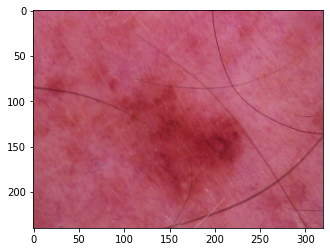

ISIC_0027742
[0. 0. 0. 1. 0. 0. 0.]


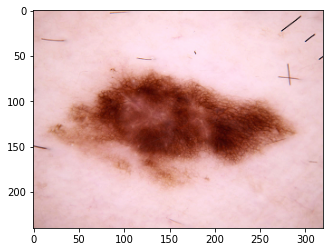

ISIC_0025506
[0. 0. 1. 0. 0. 0. 0.]


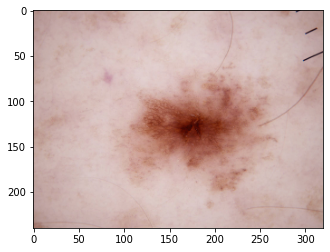

ISIC_0026461
[0. 0. 1. 0. 0. 0. 0.]


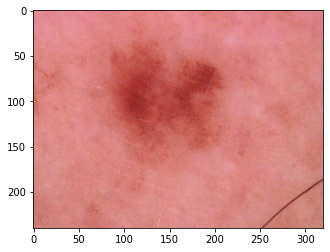

ISIC_0024386
[0. 1. 0. 0. 0. 0. 0.]


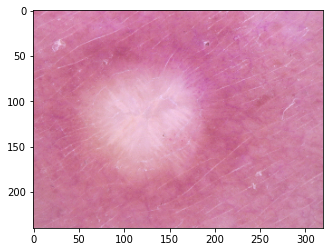

ISIC_0034193
[0. 0. 1. 0. 0. 0. 0.]


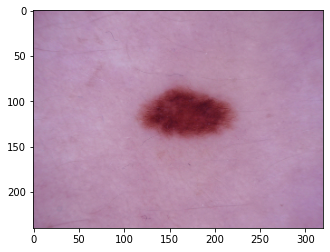

ISIC_0028200
[0. 0. 0. 0. 1. 0. 0.]


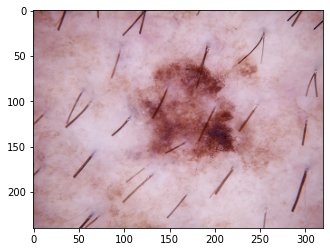

ISIC_0025689
[0. 0. 1. 0. 0. 0. 0.]


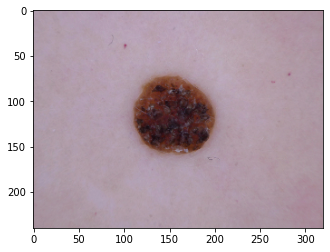

In [17]:
#Test to make sure we have correct x and y
import matplotlib.pyplot as plt

r = [1, 2, 3, 4, 14, 24, 124, 76]

# for i in r: 
#     print(Names[i]) 
#     print(y[i])
#     plt.imshow(X[i])
#     plt.show()

for i in r:
    print(Names[i]) 
    print(train_y[i])
    plt.imshow(train_X[i])
    plt.show()



In [0]:
# !pip install keras --upgrade
mod_count = 1

In [30]:
#Hyperparameters. 
num_epochs = 50
batch_size = 32
  
# print(count_none)

model = build_model()
mod_count += 1


# tb = keras.callbacks.tensorboard_v1.TensorBoard(log_dir='./logs_rnn_1', 
#     histogram_freq=1, batch_size=batch_size, write_graph=True, write_grads=True, 
#     write_images=False, embeddings_freq=0, embeddings_layer_names=None, 
#     embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

filepath=str(mod_count) + "sc{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=.3, patience=10)

print('here')
history = model.fit(train_X, train_y, shuffle = True, epochs=num_epochs, batch_size=batch_size, validation_split=.2, callbacks = [checkpoint, es], verbose=1)




here
Train on 6409 samples, validate on 1603 samples
Epoch 1/50
6409/6409 [==============================] - 15s 2ms/step - loss: 51.1736 - accuracy: 0.6605 - val_loss: 1.4822 - val_accuracy: 0.6656
Epoch 2/50
6409/6409 [==============================] - 15s 2ms/step - loss: 1.0483 - accuracy: 0.6722 - val_loss: 1.2155 - val_accuracy: 0.6656
Epoch 3/50
6409/6409 [==============================] - 15s 2ms/step - loss: 0.9915 - accuracy: 0.6703 - val_loss: 1.2626 - val_accuracy: 0.6656
Epoch 4/50
6409/6409 [==============================] - 14s 2ms/step - loss: 0.9781 - accuracy: 0.6705 - val_loss: 1.2133 - val_accuracy: 0.6656
Epoch 5/50
6409/6409 [==============================] - 14s 2ms/step - loss: 0.9645 - accuracy: 0.6709 - val_loss: 1.0636 - val_accuracy: 0.6650
Epoch 6/50
6409/6409 [==============================] - 14s 2ms/step - loss: 0.9612 - accuracy: 0.6705 - val_loss: 1.0360 - val_accuracy: 0.6656
Epoch 7/50
6409/6409 [==============================] - 14s 2ms/step - loss:

2003/2003 [==============================] - 17s 9ms/step
[0.5377681833978778, 0.8337493538856506]


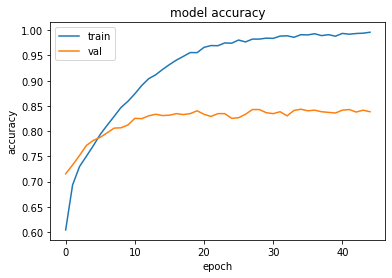

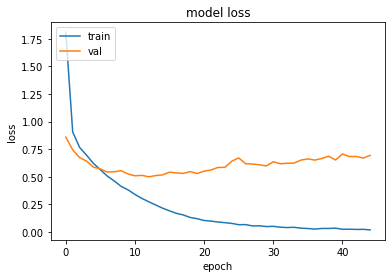

In [10]:
from keras.models import load_model

final_model = load_model('/content/3sc20-084.hdf5')
print(final_model.evaluate(test_X, test_y, verbose = 1))

import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss.png')
plt.show()



# DenseNet Training



In [0]:
mod_count = 1

In [8]:
#Densenet................
from keras.callbacks import EarlyStopping

#Hyperparameters. 
num_epochs = 45
batch_size = 32
  
# print(count_none)

model = build_densenet_model()
mod_count += 1


# tb = keras.callbacks.tensorboard_v1.TensorBoard(log_dir='./logs_rnn_1', 
#     histogram_freq=1, batch_size=batch_size, write_graph=True, write_grads=True, 
#     write_images=False, embeddings_freq=0, embeddings_layer_names=None, 
#     embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

filepath=str(mod_count) + "sc{epoch:02d}-{val_accuracy:.2f}.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
# es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=.3, patience=10)

history = model.fit(train_X, train_y, shuffle = True, epochs=num_epochs, batch_size=batch_size, validation_split=.2, callbacks = [checkpoint], verbose=1)



last layer output shape: (None, 6, 8, 1920)
Train on 6409 samples, validate on 1603 samples
Epoch 1/45
6409/6409 [==============================] - 207s 32ms/step - loss: 1.8104 - accuracy: 0.6043 - val_loss: 0.8597 - val_accuracy: 0.7155
Epoch 2/45
6409/6409 [==============================] - 134s 21ms/step - loss: 0.9059 - accuracy: 0.6934 - val_loss: 0.7438 - val_accuracy: 0.7330
Epoch 3/45
6409/6409 [==============================] - 134s 21ms/step - loss: 0.7659 - accuracy: 0.7298 - val_loss: 0.6734 - val_accuracy: 0.7517
Epoch 4/45
6409/6409 [==============================] - 134s 21ms/step - loss: 0.6957 - accuracy: 0.7504 - val_loss: 0.6422 - val_accuracy: 0.7717
Epoch 5/45
6409/6409 [==============================] - 134s 21ms/step - loss: 0.6210 - accuracy: 0.7713 - val_loss: 0.5869 - val_accuracy: 0.7817
Epoch 6/45
6409/6409 [==============================] - 134s 21ms/step - loss: 0.5638 - accuracy: 0.7936 - val_loss: 0.5708 - val_accuracy: 0.7879
Epoch 7/45
6409/6409 [====

2003/2003 [==============================] - 18s 9ms/step
[0.6721888740718573, 0.8397403955459595]


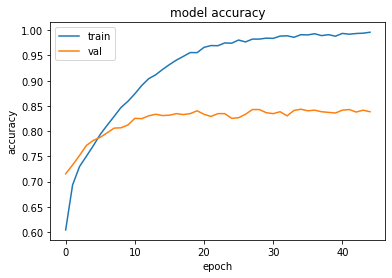

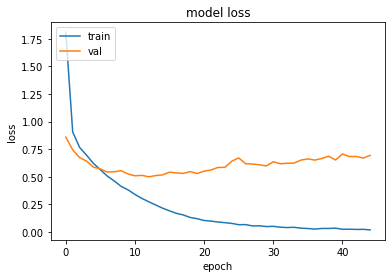

In [14]:
from keras.models import load_model

final_model = load_model('/content/3sc35-084.hdf5')
print(final_model.evaluate(test_X, test_y, verbose = 1))

import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss.png')
plt.show()
